In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import pchip_interpolate

In [2]:
from toy_tools import *

In [3]:
def deconv(m, r, npoints):
    m_fft = np.fft.fft(m, n=npoints)
    r_fft = np.fft.fft(r, n=npoints)
    s_fft = m_fft / r_fft
    #s_fft[npoints//2-10:npoints//2+10] = 0
    return np.fft.ifft(m_fft / r_fft)

In [8]:
'''
Npoints -->  N+1 points with a predefined roi
'''

def run(pos=8_700):
    q = 30_600
    delay = 15
    thres = 6_000
    roi = 5*delay
    npoints = 10_000
    
    unit_fr = load_fr_ctr('response_44_v2a_100ns.npy')
    q0 = q*np.ones(1)
    # from toy_translation.ipynb
    r = 20
    sigma = 2
    q1 = q_gaus(q=q, r=21, sigma=sigma)
    fr0 = fr_record(q0, pos, unit_fr)
    fr1 = fr_record(q1, pos, unit_fr)

    r0 = readout(fr0, thres=thres, delay=delay)
    r1 = readout(fr1, thres=thres, delay=delay)

    r0_smooth = smooth_wf2(wf=r0, thres=thres, roi=roi, delay=delay, npoints=npoints)
    r1_smooth = smooth_wf2(wf=r1, thres=thres, roi=roi, delay=delay, npoints=npoints)

    q0_ifft = deconv(r0_smooth, unit_fr, npoints)
    q1_ifft = deconv(r1_smooth, unit_fr, npoints)

    ts0 = np.arange(0, npoints, 1, dtype=np.int_)
    ts1 = np.arange(0, npoints, 1, dtype=np.int_)

    q0_ifft = q0_ifft
    q1_ifft = q1_ifft

    ts = np.arange(0, npoints, 1, dtype=np.int_)
    aux_t = npoints - len(unit_fr) - pos
    ts_q0 = [aux_t]
    ts_q1 = np.arange(0+aux_t, len(q1)+aux_t, 1, dtype=np.int_)
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(5*2, 3))
    ax0.bar(x=ts_q0, height=q0, width=1, label='qDelta')
    ax0.plot(ts0, q0_ifft, linestyle='dotted', label='deconv.', c='orange')
    ax1.bar(x=ts_q0, height=q0, width=1, label='qDelta')
    ax1.plot(ts0, q0_ifft, linestyle='dotted', label='deconv.', c='orange')
    ax0.legend()
    ax1.legend()
    ax1.set_xlim(-80+aux_t, 80+aux_t)
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(5*2, 3))

    ax0.plot(ts_q1, q1, linestyle='--', label='qGaus')
    ax0.plot(ts1, q1_ifft, linestyle='dotted', label='deconv.')
    ax1.plot(ts_q1, q1, linestyle='--', label='qGaus')
    ax1.plot(ts1, q1_ifft, linestyle='dotted', label='deconv.')
    ax0.legend()
    ax1.legend()
    ax1.set_xlim(-80+aux_t, 80+aux_t)
    
    print(np.sum(q1))
    print(np.sum(q1_ifft))

shape of center region (5, 5, 2000)
integration of first 700 ticks 0.0010430221411030683
drop first 700 ticks and renormalize
17.0
[[1104, 1179, 6000], [1179, 1194, 12770.612597685362], [1194, 1211, 9566.283843871779]]
18.0
[[1114, 1189, 6000], [1189, 1204, 13428.274903172776], [1204, 1222, 8952.55635409673]]
30599.999233925155
(28380.83125726952+2.8272774843121063e-27j)


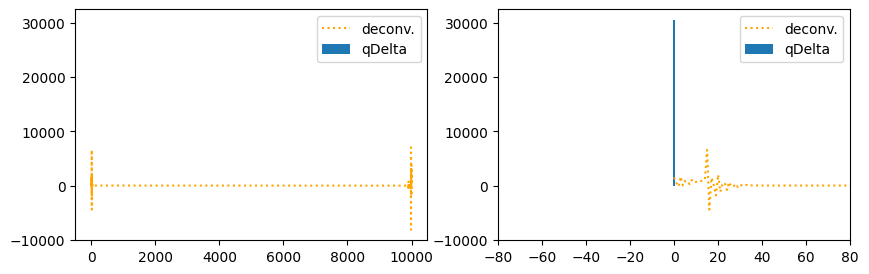

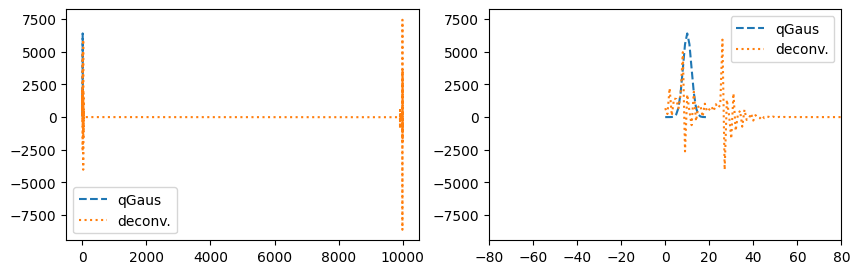

In [9]:
run(8700)

shape of center region (5, 5, 2000)
integration of first 700 ticks 0.0010430221411030683
drop first 700 ticks and renormalize
17.0
[[3104, 3179, 6000], [3179, 3194, 12770.612597685362], [3194, 3211, 9566.283843871779]]
18.0
[[3114, 3189, 6000], [3189, 3204, 13428.27490317278], [3204, 3222, 8952.55635409673]]
30599.999233925155
(28380.831257269507-4.4428646182047385e-27j)


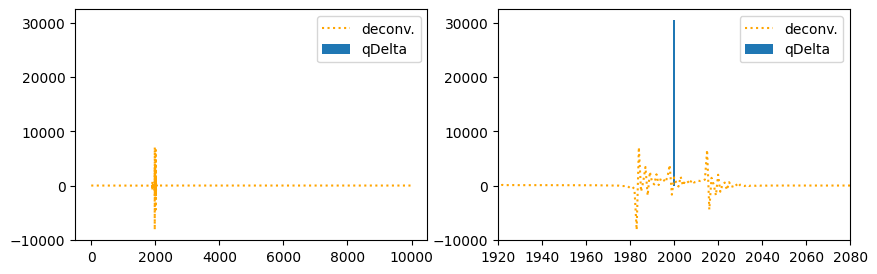

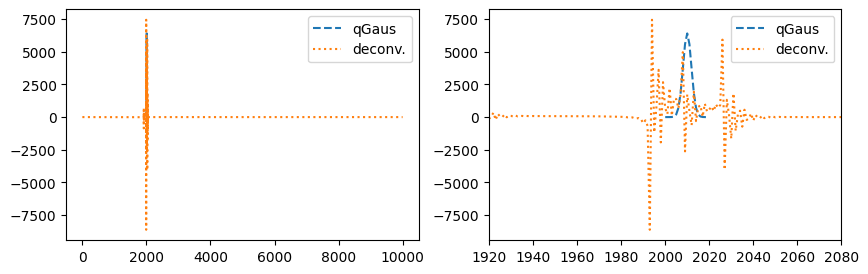

In [10]:
run(6700)